# Week 12 Programming Assignment

As you're working on identifying data for your final project, it's helpful to spend some time exploring your various data files.  For this week's assignment, I'd like you to take a few of the ideas from the the lectures, review assignment, and tonight's lecture to start exploring the data you plan to use for the final project.

For the following activities, you can use just one of the data files that you've identified, or you can do the activities using different data files.  That's up to you.  Please describe what you're doing in a Markdown cell or in the comments of your code.  When you've completed the assignment, submit it as normal.

### 1. Basic Statistics

Use Python to read in your data file and show many rows and columns your data has.

In [1]:
import pandas as pd

In [2]:
# read Missouri county level Angina or coronary heart disease datafile (2019)--data derived from 'yes' response to the following question:'Has a doctor, nurse, or other health professional ever told you had angina or coronary heart disease?'# '

hd = pd.read_csv('MOHDP_hd_2019.csv',header =2, skipfooter = 3)

/opt/tljh/user/lib/python3.6/site-packages/ipykernel_launcher.py:3: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  This is separate from the ipykernel package so we can avoid doing imports until


In [3]:
# read Missori county level risk factors for heart disease among adults 18 years and older high blood pressure datafile and current smoking datafile#
riskfactors_hbp = pd.read_csv('MOHDP_hbp_2016.csv', header=2, skipfooter = 3)
riskfactors_smoking = pd.read_excel('MOHDP_smoking.xlsx', header =2, skipfooter =3)

/opt/tljh/user/lib/python3.6/site-packages/ipykernel_launcher.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  


In [4]:
def remove_col(dataframe):
    dataframe = dataframe.drop(['Lower 95% Confidence Limit', 'Upper 95% Confidence Limit', 'Significantly Different'], axis = 1)
    
    return dataframe

In [5]:
hd = remove_col(hd)
riskfactors_hbp=remove_col(riskfactors_hbp)
riskfactors_smoking = remove_col(riskfactors_smoking).copy()

In [6]:
#remove some columns, keep columns:['Geography', 'Geography Type', 'Data Years', 'Population Estimate','Weighted Percent'], and merge datafiles#
hd= hd.rename(columns={'Population Estimate':'hd_Population Estimate', 'Weighted Percent': 'hd_Weighted Percent', 'Data Years': 'HD_Date Year'})

In [7]:
riskfactors_hbp= riskfactors_hbp.rename(columns={'Population Estimate':'HBP_Population Estimate', 'Weighted Percent': 'HBP_Weighted Percent'})
riskfactors_smoking= riskfactors_smoking.rename(columns={'Population Estimate':'smoking_Population Estimate', 'Weighted Percent': 'smoking_Weighted Percent'})

In [8]:
riskfactors = pd.merge(riskfactors_hbp, riskfactors_smoking, how="left", on=["Geography", "Geography Type", "Data Years"])
riskfactors = riskfactors.rename(columns = {'Data Years':'Riskfactors_Data Years'})


In [9]:
hd_rfs = pd.merge(hd, riskfactors, how = 'left', on=["Geography", "Geography Type"] )

In [18]:
hd_rfs.shape
print("The merged data file has {} rows and {} columns.".format(hd_rfs.shape[0], hd_rfs.shape[1]))

The merged data file has 123 rows and 10 columns.


### 2. Data Diversity

Use Python to identify how many unique values each column in your data has.  Use Python to identify which column has the greatest number of distinct values (aka the most diversity)?

In [11]:
unumbers = {}
for i in hd_rfs.columns:
    a = len(hd_rfs[i].unique())
    unumbers[i] = a
unumbers

{'Geography': 123,
 'Geography Type': 3,
 'HD_Date Year': 1,
 'hd_Population Estimate': 8,
 'hd_Weighted Percent': 7,
 'Riskfactors_Data Years': 1,
 'HBP_Population Estimate': 123,
 'HBP_Weighted Percent': 95,
 'smoking_Population Estimate': 122,
 'smoking_Weighted Percent': 89}

In [19]:
maxcols = []
for i in unumbers:
    if unumbers[i] == max(unumbers.values()):
        maxcols.append(i)
maxcols
print("'{}' column and '{}' column have the greatest number of distinct values.".format(maxcols[0],maxcols[1]))

'Geography' column and 'HBP_Population Estimate' column have the greatest number of distinct values.


### 3. Data Redundancy

Use Python to identify any columns in your data where the value for every row is the same.  For example, if you had a gender column and all the rows said 'M', then you would want to write the code that helped you determine that.

In [13]:
ucols = []
for i in unumbers:
    if unumbers[i] == 1:
        ucols.append(i)
ucols

['HD_Date Year', 'Riskfactors_Data Years']

### 4. Range of Values

Your data almost certainly has some numeric columns that can be summed or averaged.  Create a histogram that shows the distribution of values for this column.

In [14]:
import matplotlib.pyplot as plt

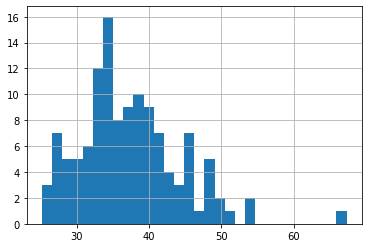

In [15]:
hd_rfs['HBP_Weighted Percent'].hist(bins = 30)

### 5. Discussion

Do any additional exploration of this data that you think may be interesting and include your code here.  Then go onto Slack and make a post about what you've observed.  Share your observation.  Share your code, if you like.  Share a screenshot of the data or a chart based on the data.

Then comment on at least two other people's observations that they share on Slack.  (Use the reply as thread option in Slack to keep the conversation organized.)

(0.0, 70.0)

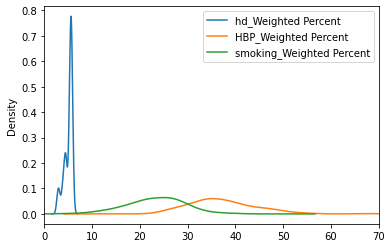

In [16]:
graph = hd_rfs[['hd_Weighted Percent','HBP_Weighted Percent','smoking_Weighted Percent']].plot.kde()
graph.set_xlim(0, 70)

Observation:
The graph shows that the percentage of people who has been told he/she had a angina or coronary heart disease by a health professional is much lower than the percentage of people who has been told he/she had high blood pressure  and the percentage of people who is current smoking in county level study.

---

## Submitting Your Work

In order to submit your work, you'll need to use the `git` command line program to **add** your homework file (this file) to your local repository, **commit** your changes to your local repository, and then **push** those changes up to github.com.  From there, I'll be able to **pull** the changes down and do my grading.  I'll provide some feedback, **commit** and **push** my comments back to you.  The first line of code below will **pull** down my comments into your local folders.

To run through everything one last time and submit your work:
1. Use the `Kernel` -> `Restart Kernel and Run All Cells` menu option to run everything from top to bottom and stop here.
2. Save this note with Ctrl-S (or Cmd-S)
2. Skip down to the last command cell (the one starting with `%%bash`) and run that cell.

If anything fails along the way with this submission part of the process, let me know.  I'll help you troubleshoort.

In [17]:
assert False, "DO NOT REMOVE THIS LINE"

AssertionError: DO NOT REMOVE THIS LINE

---

In [ ]:
%%bash
git pull
git add week12_assignment_2.ipynb
git commit -a -m "Submitting the week 12 assignment"
git push


---

If the message above says something like _Submitting the week 10 review exercises_ or _Everything is up to date_, then your work was submitted correctly.